In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, RidgeCV, LogisticRegression,SGDClassifier
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report,confusion_matrix
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras

In [2]:
df=pd.read_csv(r"D:\Anaconda\1-Jupyter\archive\weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


In [5]:
print("Shape:",df.shape)
df.head()

Shape: (142193, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Columns: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object') 



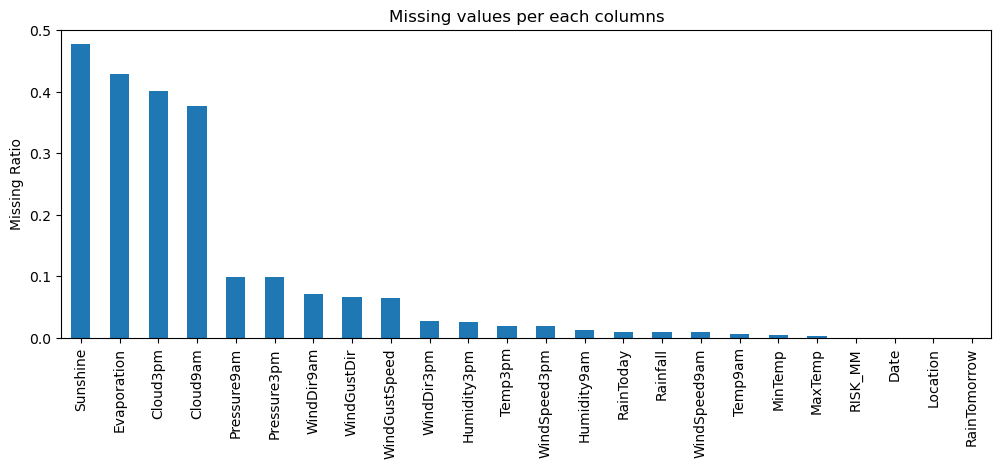

In [6]:
print("Columns:",df.columns,"\n")
df.isnull().mean().sort_values(ascending=False).plot(kind='bar',figsize=(12,4),title='Missing values per each columns') 
#so we will use drop to remove columns -->df.drop([])
plt.ylabel('Missing Ratio')
plt.show()

In [7]:
print("No.Duplicated=",df.duplicated().sum())
df.drop_duplicates(inplace=True)
df

No.Duplicated= 0


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [8]:
df.isnull().sum().sort_values()  #so,we will use dropna to remove rows

Date                 0
RISK_MM              0
RainTomorrow         0
Location             0
MaxTemp            322
MinTemp            637
Temp9am            904
WindSpeed9am      1348
Rainfall          1406
RainToday         1406
Humidity9am       1774
WindSpeed3pm      2630
Temp3pm           2726
Humidity3pm       3610
WindDir3pm        3778
WindGustSpeed     9270
WindGustDir       9330
WindDir9am       10013
Pressure3pm      13981
Pressure9am      14014
Cloud9am         53657
Cloud3pm         57094
Evaporation      60843
Sunshine         67816
dtype: int64

In [9]:
df.dropna(inplace=True)  #Removing rows
df.isnull().sum().sort_values()

Date             0
RainToday        0
Temp3pm          0
Temp9am          0
Cloud3pm         0
Cloud9am         0
Pressure3pm      0
Pressure9am      0
Humidity3pm      0
Humidity9am      0
WindSpeed3pm     0
WindSpeed9am     0
WindDir3pm       0
WindDir9am       0
WindGustSpeed    0
WindGustDir      0
Sunshine         0
Evaporation      0
Rainfall         0
MaxTemp          0
MinTemp          0
Location         0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [10]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


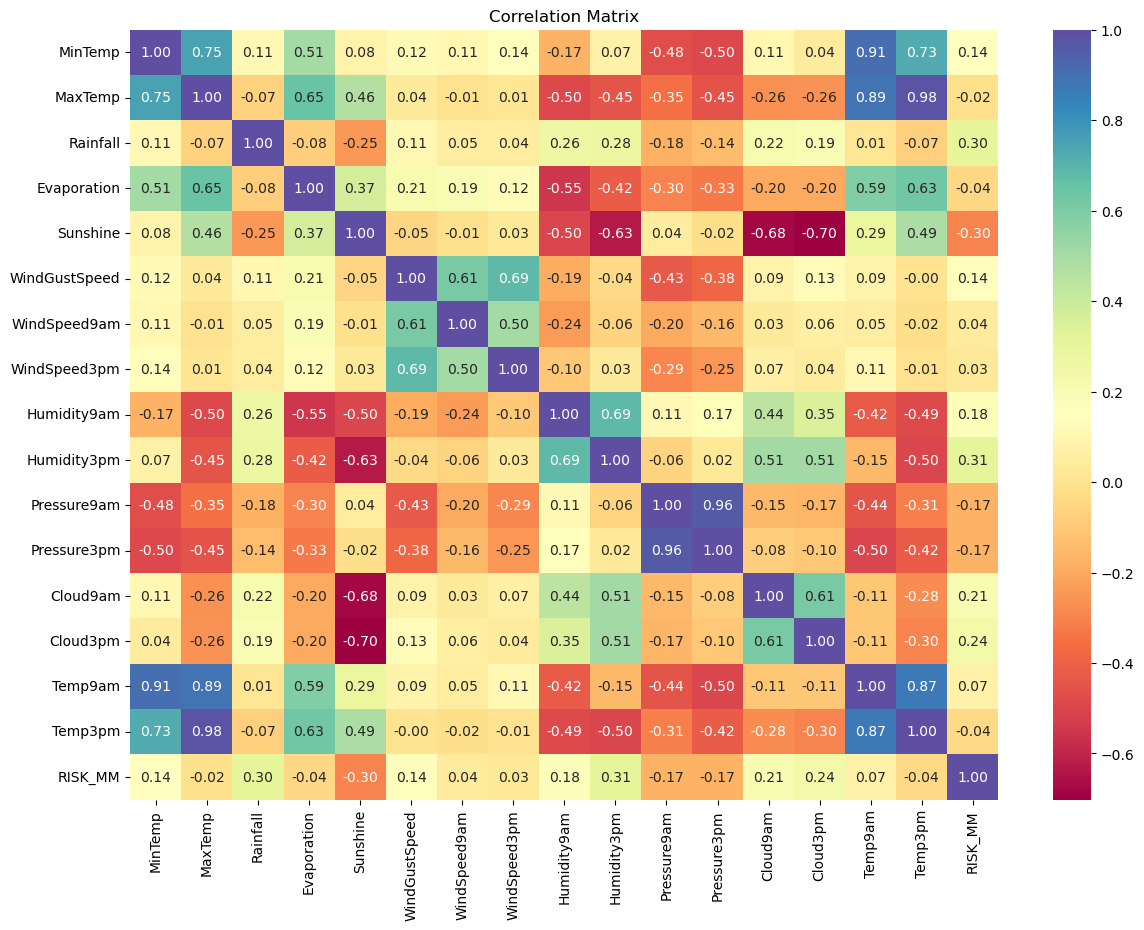

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='Spectral', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

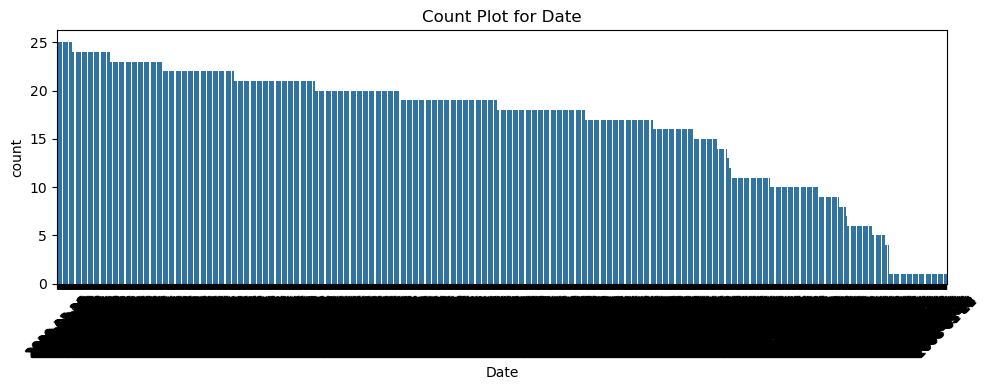

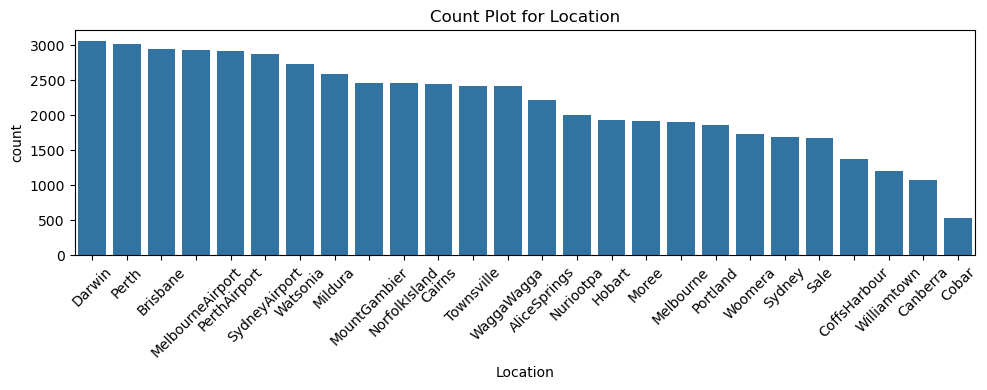

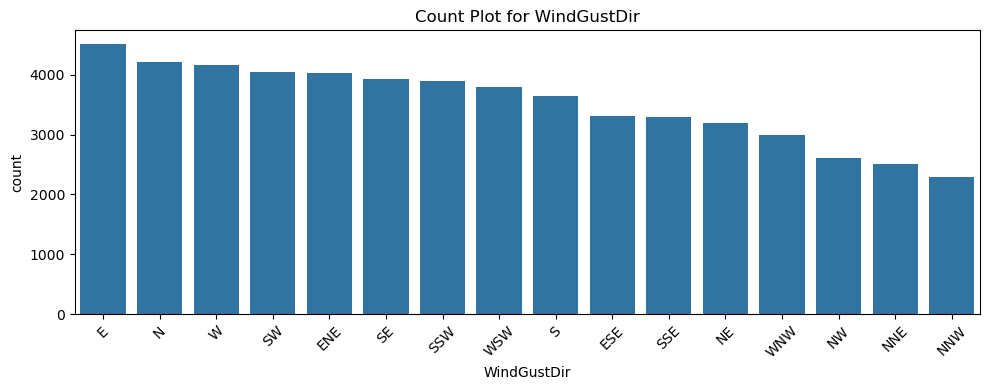

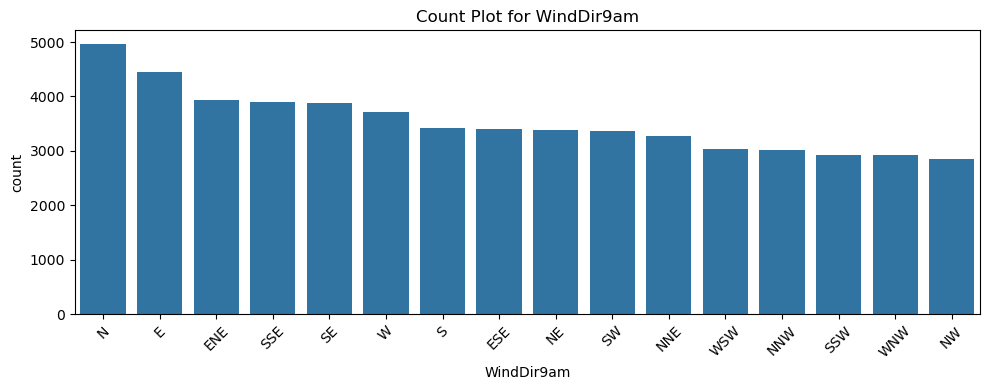

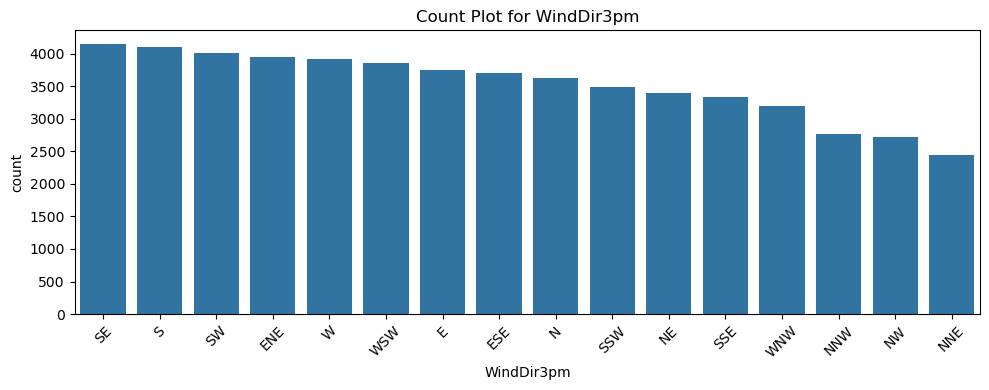

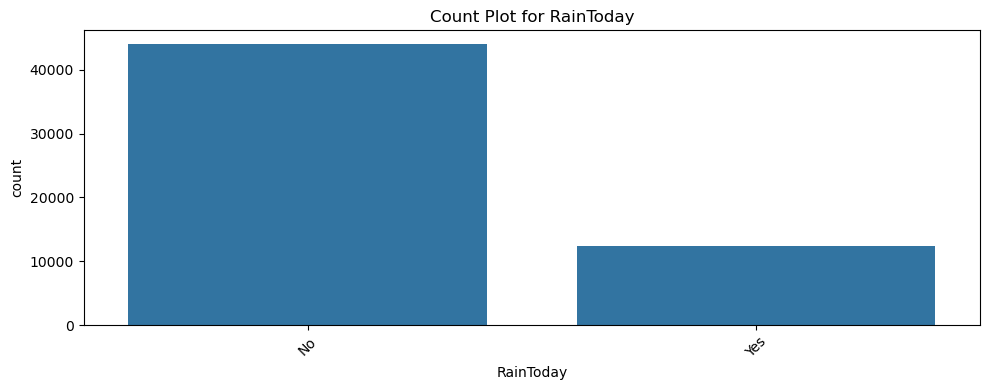

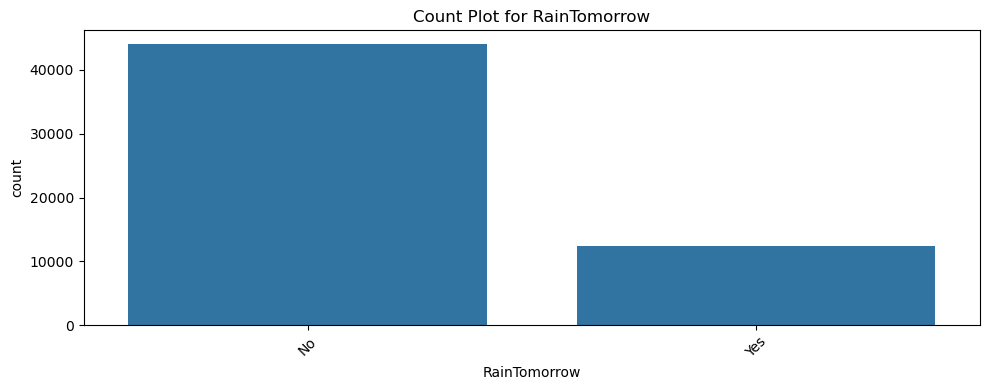

In [12]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in categorical_cols:
    lb = LabelEncoder()
    df[col] = lb.fit_transform(df[col])
    label_encoders[col] = lb

In [14]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.drop('Date', axis=1, inplace=True)

In [15]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
5939,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,2.0,5.0,26.6,33.4,0,0.0,0,1970,1,1
5940,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,1.0,1.0,20.3,27.0,0,0.0,0,1970,1,1
5942,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,1.0,6.0,28.7,34.9,0,0.0,0,1970,1,1
5943,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,1.0,5.0,29.1,35.6,0,0.0,0,1970,1,1
5944,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,1.0,6.0,33.6,37.6,0,0.0,0,1970,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,...,0.0,1.0,24.5,32.3,0,0.0,0,1970,1,1
139109,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,...,7.0,0.0,24.8,32.0,0,0.0,0,1970,1,1
139110,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,...,0.0,0.0,24.8,32.1,0,0.0,0,1970,1,1
139111,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,...,1.0,1.0,24.8,29.2,0,0.0,0,1970,1,1


In [16]:
x = df.drop("RainTomorrow", axis=1)
y = df['RainTomorrow']

In [17]:
y.value_counts()

RainTomorrow
0    43993
1    12427
Name: count, dtype: int64

In [18]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(x, 
              y, test_size= 0.20, random_state=42,stratify=y)
# Val set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full
                                                      , test_size= 0.10,stratify=y_train_full)

print("X_train  = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test   = ",X_test.shape ," y_test = ", y_test.shape)
print("X_valid  = ",X_valid.shape ," y_valid = ", y_valid.shape)


X_train  =  (40622, 25)  y_train =  (40622,)
X_test   =  (11284, 25)  y_test =  (11284,)
X_valid  =  (4514, 25)  y_valid =  (4514,)


In [19]:
y[y==0].count()

43993

In [20]:
scaler = StandardScaler()
X_train_1= scaler.fit_transform(X_train)
X_test_1= scaler.transform(X_test)

In [21]:
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
5939,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,...,2.0,5.0,26.6,33.4,0,0.0,0,1970,1,1
5940,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,...,1.0,1.0,20.3,27.0,0,0.0,0,1970,1,1
5942,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,...,1.0,6.0,28.7,34.9,0,0.0,0,1970,1,1
5943,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,...,1.0,5.0,29.1,35.6,0,0.0,0,1970,1,1
5944,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,...,1.0,6.0,33.6,37.6,0,0.0,0,1970,1,1
5945,4,27.1,36.1,0.0,13.0,0.0,3,43.0,3,14,...,8.0,8.0,30.7,34.3,0,0.0,0,1970,1,1
5946,4,23.3,34.0,0.0,9.8,12.6,11,41.0,8,10,...,3.0,1.0,25.0,31.5,0,0.0,0,1970,1,1
5947,4,16.1,34.2,0.0,14.6,13.2,9,37.0,9,8,...,1.0,1.0,20.7,32.8,0,0.0,0,1970,1,1
5948,4,19.0,35.5,0.0,12.0,12.3,1,48.0,1,15,...,1.0,5.0,23.4,33.3,0,0.0,0,1970,1,1
5949,4,19.7,35.5,0.0,11.0,12.7,4,41.0,5,15,...,1.0,5.0,24.0,33.6,0,0.0,0,1970,1,1


In [22]:
'''
lasso = LassoCV()
lasso.fit(X_train_1, y_train)
y_pred_lasso = lasso.predict(X_test_1).round()
print("Lasso Classifier Accuracy:", accuracy_score(y_test, y_pred_lasso))
print("Lasso", y_test, y_pred_lasso)
sns.heatmap(confusion_matrix(y_test, y_pred_lasso), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Lasso Classifier")
plt.show()
print(classification_report(y_test, y_pred_lasso))
'''

'\nlasso = LassoCV()\nlasso.fit(X_train_1, y_train)\ny_pred_lasso = lasso.predict(X_test_1).round()\nprint("Lasso Classifier Accuracy:", accuracy_score(y_test, y_pred_lasso))\nprint("Lasso", y_test, y_pred_lasso)\nsns.heatmap(confusion_matrix(y_test, y_pred_lasso), annot=True, fmt="d", cmap="YlGnBu")\nplt.title("Confusion Matrix - Lasso Classifier")\nplt.show()\nprint(classification_report(y_test, y_pred_lasso))\n'

In [23]:
'''
ridge = RidgeCV()
ridge.fit(X_train_1, y_train)
y_pred_ridge = ridge.predict(X_test_1).round()
print("Ridge Classifier Accuracy:", accuracy_score(y_test, y_pred_ridge))
print("Ridge", y_test, y_pred_ridge)
sns.heatmap(confusion_matrix(y_test, y_pred_ridge), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Ridge Classifier")
plt.show()
print(classification_report(y_test, y_pred_ridge))
'''

'\nridge = RidgeCV()\nridge.fit(X_train_1, y_train)\ny_pred_ridge = ridge.predict(X_test_1).round()\nprint("Ridge Classifier Accuracy:", accuracy_score(y_test, y_pred_ridge))\nprint("Ridge", y_test, y_pred_ridge)\nsns.heatmap(confusion_matrix(y_test, y_pred_ridge), annot=True, fmt="d", cmap="YlGnBu")\nplt.title("Confusion Matrix - Ridge Classifier")\nplt.show()\nprint(classification_report(y_test, y_pred_ridge))\n'

Logistic Regression Accuracy: 0.9940623892236795


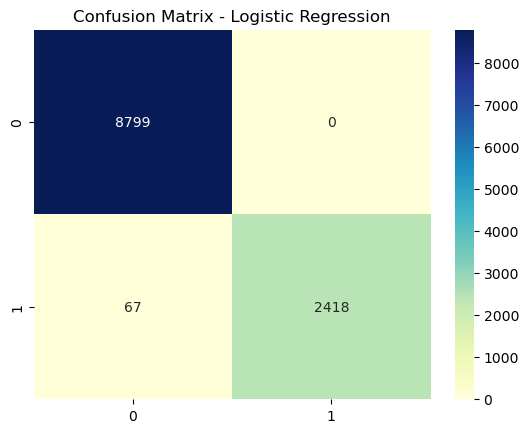

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8799
           1       1.00      0.97      0.99      2485

    accuracy                           0.99     11284
   macro avg       1.00      0.99      0.99     11284
weighted avg       0.99      0.99      0.99     11284



In [24]:
lr = LogisticRegression()
lr.fit(X_train_1, y_train)
y_pred_lr = lr.predict(X_test_1)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
print(classification_report(y_test, y_pred_lr))

SGD Classifier Accuracy: 0.989985820630982


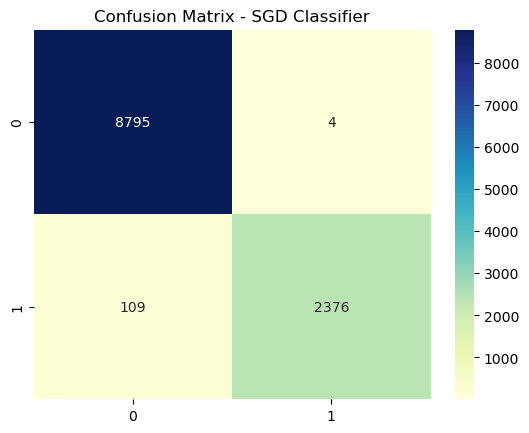

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8799
           1       1.00      0.96      0.98      2485

    accuracy                           0.99     11284
   macro avg       0.99      0.98      0.99     11284
weighted avg       0.99      0.99      0.99     11284



In [25]:
sgd = SGDClassifier(max_iter=1000)
sgd.fit(X_train_1, y_train)
y_pred_sgd = sgd.predict(X_test_1)
print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
sns.heatmap(confusion_matrix(y_test, y_pred_sgd), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - SGD Classifier")
plt.show()
print(classification_report(y_test, y_pred_sgd))

Naive Bayes Accuracy: 0.9408897554058845


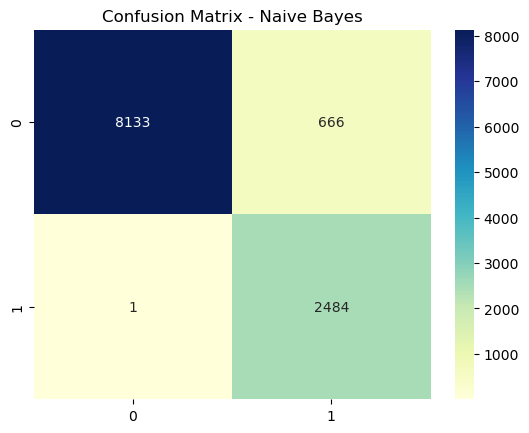

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      8799
           1       0.79      1.00      0.88      2485

    accuracy                           0.94     11284
   macro avg       0.89      0.96      0.92     11284
weighted avg       0.95      0.94      0.94     11284



In [26]:
nb = GaussianNB()
nb.fit(X_train_1, y_train)
y_pred_nb = nb.predict(X_test_1)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()
print(classification_report(y_test, y_pred_nb))

Accuracy: 1.0


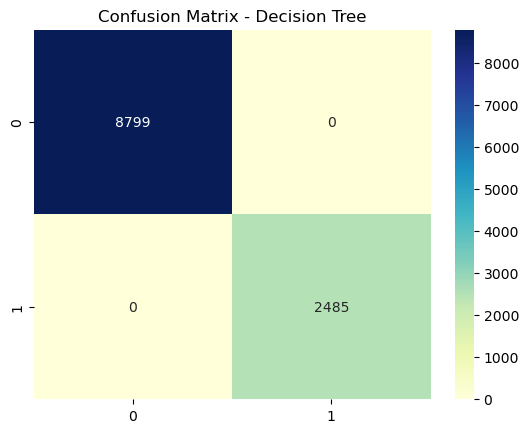

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8799
           1       1.00      1.00      1.00      2485

    accuracy                           1.00     11284
   macro avg       1.00      1.00      1.00     11284
weighted avg       1.00      1.00      1.00     11284



In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_1, y_train)
y_pred_dt = dt.predict(X_test_1)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()
print(classification_report(y_test, y_pred_dt))

Accuracy: 1.0


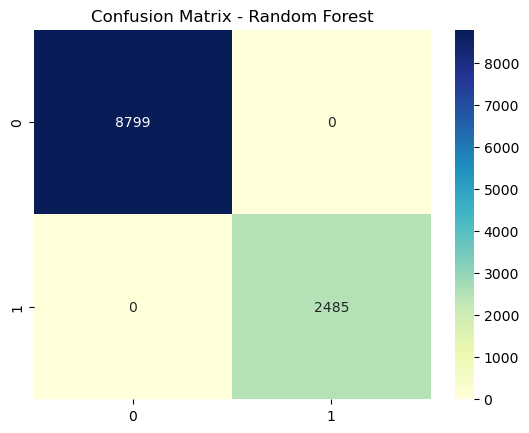

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8799
           1       1.00      1.00      1.00      2485

    accuracy                           1.00     11284
   macro avg       1.00      1.00      1.00     11284
weighted avg       1.00      1.00      1.00     11284



In [28]:
rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf.fit(X_train_1, y_train)
y_pred_rf = rf.predict(X_test_1)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()
print(classification_report(y_test, y_pred_rf))

In [29]:
from tensorflow.keras import layers
model = keras.models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])
# Show model summary
print(model.summary())

D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [30]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.003),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [31]:
# Training and evaluating the model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss',patience=5, restore_best_weights=True)
history = model.fit(X_train_1, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid),callbacks=[early_stop])

Epoch 1/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8259 - loss: 0.3935 - val_accuracy: 0.8168 - val_loss: 25.4122
Epoch 2/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.9703 - loss: 0.0944 - val_accuracy: 0.8520 - val_loss: 16.7954
Epoch 3/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - accuracy: 0.9796 - loss: 0.0593 - val_accuracy: 0.2202 - val_loss: 274.1839
Epoch 4/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.9822 - loss: 0.0472 - val_accuracy: 0.2202 - val_loss: 226.4646
Epoch 5/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step - accuracy: 0.9852 - loss: 0.0398 - val_accuracy: 0.2202 - val_loss: 91.7659
Epoch 6/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step - accuracy: 0.9867 - loss: 0.0337 - val_accuracy: 0.8591 - val_loss: 43.7648
Epoch 7/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step - accuracy: 0.9891 - loss: 0.0288 - val_accuracy: 0.9313 - val_loss: 5.5895
Epoch 8/50
1270/1270 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step - accuracy: 0.

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      8799
           1       1.00      0.68      0.81      2485

    accuracy                           0.93     11284
   macro avg       0.96      0.84      0.88     11284
weighted avg       0.93      0.93      0.92     11284

Confusion Matrix:
[[8799    0]
 [ 806 1679]]


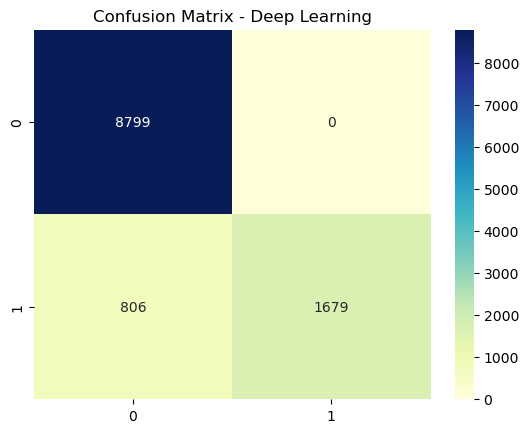

In [32]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Deep Learning")
plt.show()

In [33]:
history.history

{'accuracy': [0.9049283862113953,
  0.9740534424781799,
  0.981315553188324,
  0.983949601650238,
  0.9861404895782471,
  0.9869775176048279,
  0.9894884824752808,
  0.9885283708572388,
  0.9892914891242981,
  0.9894884824752808,
  0.9895377159118652,
  0.989931583404541],
 'loss': [0.26052314043045044,
  0.07993341237306595,
  0.05389852821826935,
  0.04332904517650604,
  0.03717168793082237,
  0.03335794433951378,
  0.028333541005849838,
  0.028536545112729073,
  0.026615262031555176,
  0.026089273393154144,
  0.02595454826951027,
  0.024540340527892113],
 'val_accuracy': [0.8167921900749207,
  0.8520159721374512,
  0.22020381689071655,
  0.22020381689071655,
  0.22020381689071655,
  0.8591049909591675,
  0.9313247799873352,
  0.8314133882522583,
  0.8225520849227905,
  0.8511298298835754,
  0.8453699350357056,
  0.8342933058738708],
 'val_loss': [25.41217041015625,
  16.79539680480957,
  274.1839294433594,
  226.464599609375,
  91.76594543457031,
  43.76478958129883,
  5.58948326110

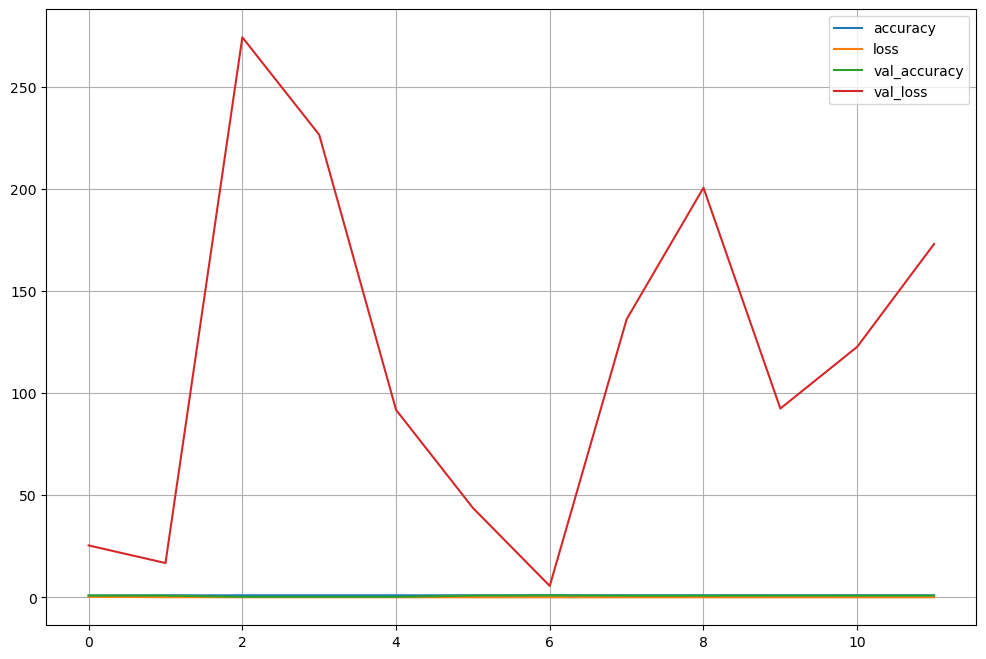

-----------------------------------------------------------------------
353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9256 - loss: 6.6378
Loss                   :  6.3537821769714355
Mean Absolute Error     :  0.9285714030265808


In [34]:
# plot the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                   : ",model_evaluate[0])
print("Mean Absolute Error     : ",model_evaluate[1])


In [35]:
from sklearn import metrics

predicted_classes= model.predict(X_test).round()

print("Accuracy : ", metrics.accuracy_score(y_test, predicted_classes))
print("Precision: ", metrics.precision_score(y_test, predicted_classes))
print("Recall   : ", metrics.recall_score(y_test, predicted_classes))
print("F1-score : ", metrics.f1_score(y_test, predicted_classes))


df_data = pd.DataFrame({
    "Actual": np.array(y_test).flatten(),
    "Predicted": predicted_classes.flatten()
})
print("-----------------------------------------------------------------------")
print(df_data.head(15))
print("-----------------------------------------------------------------------")

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step
Accuracy :  0.9285714285714286
Precision:  1.0
Recall   :  0.6756539235412475
F1-score :  0.8064361191162344
-----------------------------------------------------------------------
    Actual  Predicted
0        0        0.0
1        1        1.0
2        0        0.0
3        0        0.0
4        0        0.0
5        1        1.0
6        0        0.0
7        0        0.0
8        1        1.0
9        0        0.0
10       0        0.0
11       1        1.0
12       0        0.0
13       1        0.0
14       0        0.0
-----------------------------------------------------------------------


In [75]:
import streamlit as st
import pandas as pd

st.title("Weather AUS Predictor")

# Load data
df = pd.read_csv(r"D:\Anaconda\1-Jupyter\archive\weatherAUS.csv")
st.write("Data Snapshot", df.head())

# Add your ML prediction code here...